In [1]:
from PIL import Image
import numpy as np
import os
import shutil

In [2]:
filenames = ["63631_2019.jpg", "10179_2004.jpg", "12345_2019.jpg", "54321_2004.jpg", "99999999999999_2008.jpg" ]

# Function to extract the year and ID from the filename
def extract_year_and_id(filename):
    parts = filename.split('_')  # Split the filename by '_'
    id_part = int(parts[0])  # Convert the first part to an integer for the ID
    year_part = int(parts[1].split('.')[0])  # Extract and convert the year part to an integer
    return year_part, id_part  # Return a tuple of year and ID

# Sort the filenames using the custom key function
sorted_filenames = sorted(filenames, key=extract_year_and_id)

print(sorted_filenames)

['10179_2004.jpg', '54321_2004.jpg', '99999999999999_2008.jpg', '12345_2019.jpg', '63631_2019.jpg']


In [3]:
files = os.listdir("images/")
files = sorted(files, key=extract_year_and_id)
# first_200 = files[:200]
# last_200 = files[-200:]
# first_last_400 = first_200 + last_200
# last_400 = files[-400:]
last_2000 = files[-2000:]

source_directory = "images/"
destination_directory = "images_subset/"

if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# for file_name in first_last_400:
for file_name in last_2000:
    source = os.path.join(source_directory, file_name)
    dest = os.path.join(destination_directory, file_name)
    shutil.copy(source, dest)

In [4]:
flattened_images = []
def resize_images(folder_path, output_folder_path, size=(800, 600)):
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Add/check your image file extensions here
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            resized_img = img.resize(size, Image.Resampling.LANCZOS)  # Use LANCZOS for high-quality downsampling
            bw_img = resized_img.convert('L')
            bw_img.save(os.path.join(output_folder_path, filename))
            
            image_array = np.array(bw_img).flatten()
            flattened_images.append(image_array)

# Specify your folder paths and desired size
folder_path = 'images_subset/'
output_folder_path = 'images_subset_resized/'
# size = (48, 48)  # example size, change according to your needs
size = (64, 64)  # example size, change according to your needs

resize_images(folder_path, output_folder_path, size)

In [7]:
mario = Image.open("mario.png").resize((64, 64), Image.Resampling.LANCZOS).convert('L')
mario_np = np.array(mario).flatten()
flattened_images.insert(0, mario_np)

In [11]:
flattened_images_np = np.array(flattened_images)
np.savetxt('anime_girls_mario.csv', flattened_images_np, delimiter=',', fmt='%d')  # '%d' for integer format

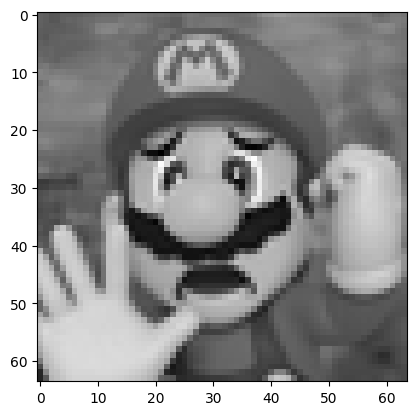

In [12]:
import matplotlib.pyplot as plt

faces = np.loadtxt("anime_girls_mario.csv", delimiter=',')
plt.imshow(faces[0].reshape(64, 64), cmap='gray')